# How to Create Animated Graphs With Python?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
overdoses = pd.read_excel("data/overdose_data_1999-2015.xls",sheet_name="Online",skiprows=6)

def get_data(table,rownum,title):
    """
    loads data from the row you are interested in
    """
    data = pd.DataFrame(table.loc[rownum][2:]).astype(float)
    data.columns = {title}
    return data

**So lets start with the animation!**

First of all, in jupyter noteboos you need to type ``%matplotlib notebook`` so you can see the animation right away in your notebook and not just after it has been saved.

In [3]:
%matplotlib notebook

### Heroin overdose numbers

In [4]:
title = 'Heroin Overdoses'
d = get_data(overdoses,18,title)
x = np.array(d.index)
y = np.array(d["Heroin Overdoses"])
overdose = pd.DataFrame(y,x)
# XN, YN = augment(x,y,10)
# augmented = pd.DataFrame(YN,XN)
overdose.columns = [title]
overdose

,Heroin Overdoses
1999,1960.0
2000,1842.0
2001,1779.0
2002,2089.0
2003,2080.0
2004,1878.0
2005,2009.0
2006,2088.0
2007,2399.0
2008,3041.0


We initialize a writer uses ffmpeg and records at 20fps with a bitrate of 1800.

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20,metadata=dict(artist='Me'),bitrate=1800)

Now create a figure with some labels.

<IPython.core.display.Javascript object>


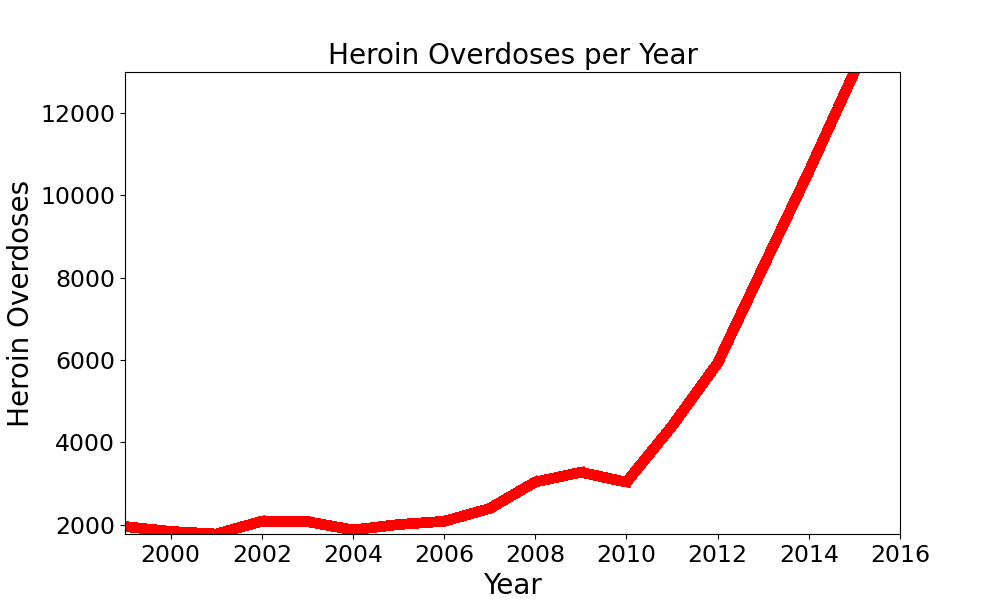

Text(0.5, 1.0, 'Heroin Overdoses per Year')

In [6]:
fig = plt.figure(figsize=(10,6))
plt.xlim(1999, 2016)
plt.ylim(np.min(overdose)[0], np.max(overdose)[0])
plt.xlabel('Year',fontsize=20)
plt.ylabel(title,fontsize=20)
plt.title('Heroin Overdoses per Year',fontsize=20)

### Animation function
Here ``i`` represents the index of the frame in the animation with this index you can select the data range which should be visible in this frame. After doing that I use a seaborn lineplot to plot this data selection. The last two lines are just to make the plot look a bit more pleasing.

In [7]:
def animate(i):
    data = overdose.iloc[:int(i+1)]                                     # select data range
    p = sns.lineplot(x=data.index, y=data[title], data=data,color="r")  # seaborn lineplot
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)

To start animation use ``matplotlib.animation.FuncAnimation`` in which you link the animation function and define how many frames your animation should contain. 

Therefore, ``frames`` defines how often ``animate(i)`` is being called.

In [ ]:
ani = animation.FuncAnimation(fig, animate, frames=17, repeat=True)

**Save your animated figure**

In [ ]:
ani.save('exp/HeroinOverdosesJumpy.mp4', writer=writer)

**We can see the saved figure here:**

![animated figure](exp/HeroinOverdosesJumpy.mp4)

To avoid jumpiness of it we need some more data points in berween the ones we already have. For this we can use another function which we call ``augment``.

In [8]:
def augment(xold,yold,numsteps):
    xnew = []
    ynew = []
    for i in range(len(xold) - 1):
        difX = xold[i+1] - xold[i]
        stepsX = difX / numsteps
        difY = yold[i+1] - yold[i]
        stepsY = difY / numsteps
        for s in range(numsteps):
            xnew = np.append(xnew,xold[i]+s*stepsX)
            ynew = np.append(ynew,yold[i]+s*stepsY)
    return xnew, ynew

Now we need to apply this function to our data and increase the number of frames in the ``animation.FuncAnimation`` function.

* ``numsteps=10``
* ``frames=160``

In [9]:
XN, YN = augment(x,y,10)
augmented = pd.DataFrame(YN,XN)

In [10]:
ani2 = animation.FuncAnimation(fig, animate, frames=160, repeat=True)

In [11]:
ani2.save('exp/HeroinOverdoses.mp4', writer=writer)

**Not Jumpy one:**

![not jumpy](exp/HeroinOverdoses.mp4)